In [26]:
# Import dependencies
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from math import sqrt

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

   year  population
0  2005   83.832661
1  2006   84.617540
2  2007   85.419591
3  2008   86.243413
4  2009   87.092252


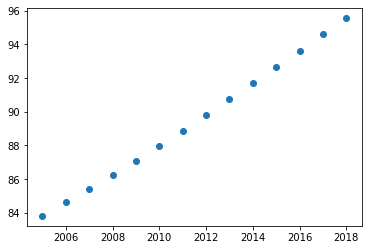

In [28]:
# Import data
path = '/Users/thainam/Documents/GitHub/grey-model/data/population.csv'
data = pd.read_csv(path)

# Check and print out data
print(data.head())
plt.scatter(data.year, data.population)
plt.show()

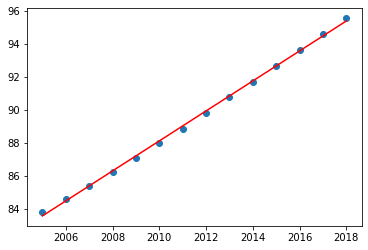

Root mean squared error score: 1.2492989573004948e-11
R^2 score: 0.9988377457684037


In [29]:
from sklearn.linear_model import LinearRegression
# Linear Regression
x = data.year[:, np.newaxis]
y = data.population[:, np.newaxis]

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

plt.scatter(x, y)
plt.plot(x, y_pred, color = 'red')
plt.show()

# Check scores
rmse = sqrt(mse(y, y_pred))
print("Root mean squared error score: " + str(rmse / 10**10))
r2 = r2_score(y, y_pred)
print("R^2 score: " + str(r2))

Root mean squared error score: 1.0536872931160654e-12
R^2 score: 0.9999917321637505


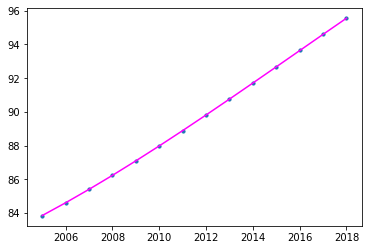

In [32]:
import operator
from sklearn.preprocessing import PolynomialFeatures
# Polynomial Regression
polynomial_features = PolynomialFeatures(degree = 4)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = sqrt(mse(y,y_poly_pred))
print("Root mean squared error score: " + str(rmse / 10**10))
r2 = r2_score(y,y_poly_pred)
print("R^2 score: " + str(r2))


plt.scatter(x, y, s=10)

# Sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='magenta')
plt.show()

In [33]:
# MAPE
y, y_pred = np.array(y), np.array(y_pred)
print(np.mean(np.abs((y - y_pred) / y)) * 100)

0.12217480645885183
